In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from adjustText import adjust_text

from pyInfinityFlow.Plotting_Utilities import assign_rainbow_colors_to_groups

os.chdir("/media/kyle_storage/kyle_ferchen/grimes_lab_main/analysis/"\
    "2022_12_07_new_multilin_panel/")

In [13]:
# Read in the CITE-seq positions
cite_umap = pd.read_csv("output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "mapped_cite_into_inflow_umap/mapped_cite_4nn_umap_and_dist_annotation.csv",
    index_col=0)

cite_groups = pd.read_csv("output/cite_inflow_integration_input/"\
    "without_adt_umi_filtering/cell_anno_cite_r7_all_cells.csv")
cite_groups.index = cite_groups["cell"]

In [31]:
# Attach umap to annotation dataframe
cite_groups.loc[:,["umap-x", "umap-y"]] = cite_umap.loc[\
    cite_groups.index.values,["umap-x", "umap-y"]].values

cite_groups

,cell,umi_adt,port,cluster,ari_group,umap-x,umap-y
cell,,,,,,,
TTGTTTGTCCGTGGTG-1.AS_CITE_HSC,TTGTTTGTCCGTGGTG-1.AS_CITE_HSC,508,AS_CITE_HSC,LT-HSC_Mllt3,HSCP,4.843840,8.671780
TTTGGTTTCGCCTATC-1.AS_CITE_HSC,TTTGGTTTCGCCTATC-1.AS_CITE_HSC,512,AS_CITE_HSC,LT-HSC_Mllt3,NaN,3.264343,8.094186
GAGTTTGGTGCTGATT-1.AS_CITE_HSC,GAGTTTGGTGCTGATT-1.AS_CITE_HSC,548,AS_CITE_HSC,LT-HSC_Mllt3,NaN,3.046479,8.398525
GCTACAAGTTAGAAAC-1.AS_CITE_HSC,GCTACAAGTTAGAAAC-1.AS_CITE_HSC,548,AS_CITE_HSC,LT-HSC_Mllt3,HSCP,3.174582,8.241629
TTACCGCGTATGCAAA-1.AS_CITE_HSC,TTACCGCGTATGCAAA-1.AS_CITE_HSC,585,AS_CITE_HSC,LT-HSC_Mllt3,HSCP,2.561091,8.506154
...,...,...,...,...,...,...,...
TTGCGTCCAGTTAAAG-1.AS_CITE_HSC,TTGCGTCCAGTTAAAG-1.AS_CITE_HSC,1937,AS_CITE_HSC,HSC-Mac_Fcna,NaN,1.063439,1.520592
AATGAAGGTTGCCGCA-1.AS_CITE_HSC,AATGAAGGTTGCCGCA-1.AS_CITE_HSC,1972,AS_CITE_HSC,HSC-Mac_Fcna,NaN,1.210337,1.582764
AAGACTCGTAATCAGA-1.AS_CITE_HSC,AAGACTCGTAATCAGA-1.AS_CITE_HSC,1973,AS_CITE_HSC,HSC-Mac_Fcna,NaN,5.136513,11.191032


In [19]:
cite_centroids = pd.pivot_table(\
    cite_groups, 
    index="cluster", 
    values=["umap-x", "umap-y"], 
    aggfunc=np.mean)

In [20]:
cite_centroids

,umap-x,umap-y
cluster,,
B-cell progenitor,10.125697,15.482834
BMCP,6.940166,2.030365
Baso,6.204648,-0.128531
Bcl11b+_preETP_Cd3d,4.439182,15.006798
Bcl11b+_preETP_Tdrd5,5.547936,14.345516
...,...,...
preNeu-3-Mac_C1qa,12.863274,-4.341866
preNeu-Ebf1,11.368623,3.947869
proNeu-1,11.253931,3.020678


In [10]:
# Read in the UMAP coordinates
path_umap_coors = "output/automated_py3_cellharmony_r7/evenly_sampled_r7/"\
    "umap_2d_coordinates_redo.csv"

umap_anno = pd.read_csv(path_umap_coors, index_col=0)

umap_anno

,umap-x,umap-y
cell_id,,
:0,10.952296,-6.878245
:1,10.202045,7.717799
:2,12.240065,-3.202506
:3,6.748181,21.352978
:4,9.314702,5.906703
...,...,...
:1935032,-4.400203,-1.029844
:1935033,12.978972,-5.007983
:1935034,10.876128,5.335987


In [17]:
# Read in R7 cluster assignments
path_r7_labels = "output/automated_py3_cellharmony_r7/"\
    "r7_py3_cellharmony_assigned_infinity_flow_groups_redo.csv"

r7_labels = pd.read_csv(path_r7_labels, index_col=0)

umap_anno["R7"] = r7_labels.loc[umap_anno.index.values, "r7"].values

umap_anno

,umap-x,umap-y,R7
cell_id,,,
:0,10.952296,-6.878245,preNeu-3-ADT
:1,10.202045,7.717799,pre-MultiLin-1
:2,12.240065,-3.202506,preNeu-1
:3,6.748181,21.352978,pre-B-Il2ra
:4,9.314702,5.906703,ETP-CC-4
...,...,...,...
:1935032,-4.400203,-1.029844,ERP4-Bcl2l15
:1935033,12.978972,-5.007983,preNeu-1
:1935034,10.876128,5.335987,MultiLin-1


In [21]:
# Calculate umap centroids to define label positions
umap_centroids = pd.pivot_table(\
    umap_anno, 
    index="R7", 
    values=["umap-x", "umap-y"], 
    aggfunc=np.median)
umap_centroids

,umap-x,umap-y
R7,,
B-cell progenitor,10.238177,16.332132
BMCP,8.020836,1.830814
Baso,5.542482,-0.104552
Bcl11b+_preETP_Cd3d,4.414455,13.773146
Bcl11b+_preETP_Tdrd5,0.311421,15.224574
...,...,...
preNeu-3-Mac_C1qa,12.558509,-4.353347
preNeu-Ebf1,11.756941,-6.640109
proNeu-1,12.703370,0.219995


In [22]:
# Read in consistent R7 color definitions
r7_colors = pd.read_csv("output/automated_py3_cellharmony_r7/"\
    "r7_clusters_to_colors_defined_2023_07_13.csv", 
    index_col=0, header=None).iloc[:,0]
r7_colors.index.name = None

r7_colors

B-cell progenitor       #3670f8
BMCP                    #a8f79c
Baso                    #1e91f3
Bcl11b+_preETP_Cd3d     #0ca7ef
Bcl11b+_preETP_Tdrd5    #3c68f9
                         ...   
preNeu-3-Mac_C1qa       #ff2c16
preNeu-Ebf1             #ffae5e
proNeu-1                #10c6e6
proNeu-1-ADT            #ffa759
proNeu-2                #90feab
Name: 1, Length: 88, dtype: object

In [26]:
# Read in evenly sampled cells
even_cells = pd.read_csv("output/automated_py3_cellharmony_r7/"\
    "evenly_sampled_r7/list_evenly_sampled_cells_redo.csv", 
    header=None).iloc[:,0].values

even_cells

array([':1530', ':3945', ':8052', ..., ':344154', ':836533', ':7039'],
      dtype=object)

array([ 0.08849809, -0.6165998 , -0.48809105, ..., 11.731153  ,
       12.73302   , 13.677734  ])

In [23]:
# Save bounds if needed later
umap_bounds = pd.concat([\
        pd.Series(umap_anno.iloc[:,:2].min(axis=0), name="min"),
        pd.Series(umap_anno.iloc[:,:2].max(axis=0), name="max")],
    axis=1)
padding = 0.05 * (umap_bounds["max"] - umap_bounds["min"])
umap_bounds["min"] = umap_bounds["min"] - padding
umap_bounds["max"] = umap_bounds["max"] + padding
umap_bounds

,min,max
umap-x,-7.457414,22.110068
umap-y,-11.751718,23.845035


In [32]:
cite_groups

,cell,umi_adt,port,cluster,ari_group,umap-x,umap-y
cell,,,,,,,
TTGTTTGTCCGTGGTG-1.AS_CITE_HSC,TTGTTTGTCCGTGGTG-1.AS_CITE_HSC,508,AS_CITE_HSC,LT-HSC_Mllt3,HSCP,4.843840,8.671780
TTTGGTTTCGCCTATC-1.AS_CITE_HSC,TTTGGTTTCGCCTATC-1.AS_CITE_HSC,512,AS_CITE_HSC,LT-HSC_Mllt3,NaN,3.264343,8.094186
GAGTTTGGTGCTGATT-1.AS_CITE_HSC,GAGTTTGGTGCTGATT-1.AS_CITE_HSC,548,AS_CITE_HSC,LT-HSC_Mllt3,NaN,3.046479,8.398525
GCTACAAGTTAGAAAC-1.AS_CITE_HSC,GCTACAAGTTAGAAAC-1.AS_CITE_HSC,548,AS_CITE_HSC,LT-HSC_Mllt3,HSCP,3.174582,8.241629
TTACCGCGTATGCAAA-1.AS_CITE_HSC,TTACCGCGTATGCAAA-1.AS_CITE_HSC,585,AS_CITE_HSC,LT-HSC_Mllt3,HSCP,2.561091,8.506154
...,...,...,...,...,...,...,...
TTGCGTCCAGTTAAAG-1.AS_CITE_HSC,TTGCGTCCAGTTAAAG-1.AS_CITE_HSC,1937,AS_CITE_HSC,HSC-Mac_Fcna,NaN,1.063439,1.520592
AATGAAGGTTGCCGCA-1.AS_CITE_HSC,AATGAAGGTTGCCGCA-1.AS_CITE_HSC,1972,AS_CITE_HSC,HSC-Mac_Fcna,NaN,1.210337,1.582764
AAGACTCGTAATCAGA-1.AS_CITE_HSC,AAGACTCGTAATCAGA-1.AS_CITE_HSC,1973,AS_CITE_HSC,HSC-Mac_Fcna,NaN,5.136513,11.191032


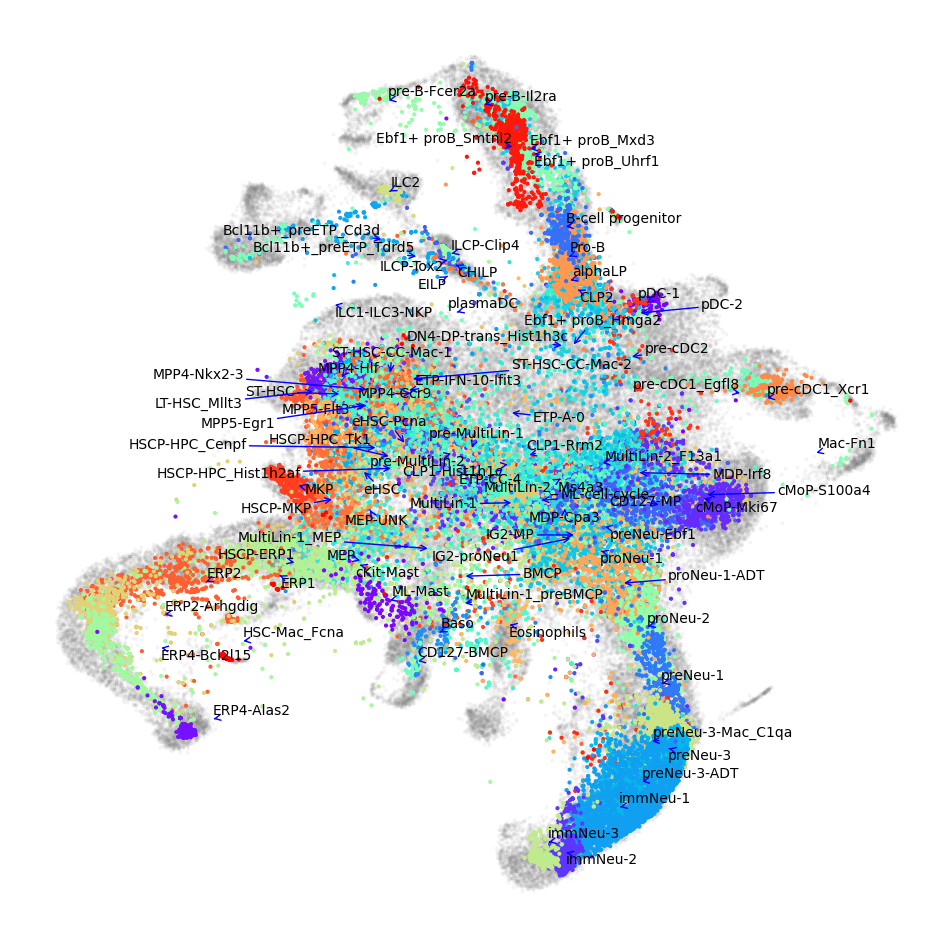

In [37]:
plt.close("all")
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(\
    umap_anno.loc[even_cells,"umap-x"].values, 
    umap_anno.loc[even_cells,"umap-y"].values, 
    c="gray", 
    alpha=0.05,
    edgecolors=None, 
    s=4)

ax.scatter(\
    cite_groups["umap-x"].values, 
    cite_groups["umap-y"].values, 
    c=[r7_colors[i] for i in cite_groups["cluster"].values], 
    alpha=1,
    edgecolors=None, 
    s=4)

texts = [ax.text(\
    cite_centroids.loc[item][0],
    cite_centroids.loc[item][1],
    item) for item in cite_centroids.index.values]
adjust_text(\
    texts, 
    x=cite_centroids.iloc[:,0].values, 
    y=cite_centroids.iloc[:,1].values,
    arrowprops=dict(arrowstyle='->', color='blue'))
ax.set_xlim(umap_bounds.iloc[0,:].values)
ax.set_ylim(umap_bounds.iloc[1,:].values)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.bottom.set_visible(False)
ax.spines.left.set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.savefig(\
    "output/plots_for_publication/opti_cite_seq_embedded_into_infinityflow.png",
    dpi=600)

In [48]:
# Plot the CITE-seq data simply as the captures they are associated with
plot_cite_umap = cite_groups.copy()

map_groups_to_colors = {\
    "AS_CITE_Kit": "#ffbb00",
    "AS_3CITE_Kitx2": "#ffbb00",
    "AS_3CITE_Kit": "#ffbb00",
    "AS_CITE_HSC": "#00c3ff",
    "AS_CITE_Multilin1": "#9d00ff",
    "AS_CITE_Multilin2": "#9d00ff",
    "AS_CITE_CD127": "#00ff55"}

plot_cite_umap["color"] = plot_cite_umap["port"].replace(\
    map_groups_to_colors).values

plot_cite_umap = plot_cite_umap.sample(plot_cite_umap.shape[0])

plot_cite_umap

,cell,umi_adt,port,cluster,ari_group,umap-x,umap-y,color
cell,,,,,,,,
CCGATCTGTGCCCGTA-1.AS_3CITE_Kit,CCGATCTGTGCCCGTA-1.AS_3CITE_Kit,776,AS_3CITE_Kit,preNeu-3,preNeu2,14.120473,-4.015721,#ffbb00
ATCGGCGGTTACGCCG-1.AS_CITE_Multilin1,ATCGGCGGTTACGCCG-1.AS_CITE_Multilin1,1383,AS_CITE_Multilin1,MultiLin-2_Ms4a3,preGM,10.399383,5.447209,#9d00ff
GTAGCTACACATTCGA-1.AS_CITE_Multilin1,GTAGCTACACATTCGA-1.AS_CITE_Multilin1,1467,AS_CITE_Multilin1,HSCP-MKP,NaN,1.651521,5.700897,#9d00ff
CCTAACCAGATCACCT-1.AS_CITE_HSC,CCTAACCAGATCACCT-1.AS_CITE_HSC,1074,AS_CITE_HSC,MPP4-Hlf,HSCP,3.448851,10.551174,#00c3ff
TTTGACTCACTGCTTC-1.AS_3CITE_Kit,TTTGACTCACTGCTTC-1.AS_3CITE_Kit,750,AS_3CITE_Kit,preNeu-3,preNeu2,14.196202,-4.361440,#ffbb00
...,...,...,...,...,...,...,...,...
CACTAAGAGCTAGTTC-1.AS_CITE_CD127,CACTAAGAGCTAGTTC-1.AS_CITE_CD127,959,AS_CITE_CD127,Ebf1+ proB_Hmga2,CD127,10.002869,11.343600,#00ff55
GTCTAGAAGGATTTGA-1.AS_3CITE_Kit,GTCTAGAAGGATTTGA-1.AS_3CITE_Kit,883,AS_3CITE_Kit,immNeu-2,NaN,9.945542,-9.091034,#ffbb00
TTGAGTGCAACAGAGC-1.AS_CITE_Multilin1,TTGAGTGCAACAGAGC-1.AS_CITE_Multilin1,1249,AS_CITE_Multilin1,MDP-Irf8,preGM,12.385950,6.949772,#9d00ff


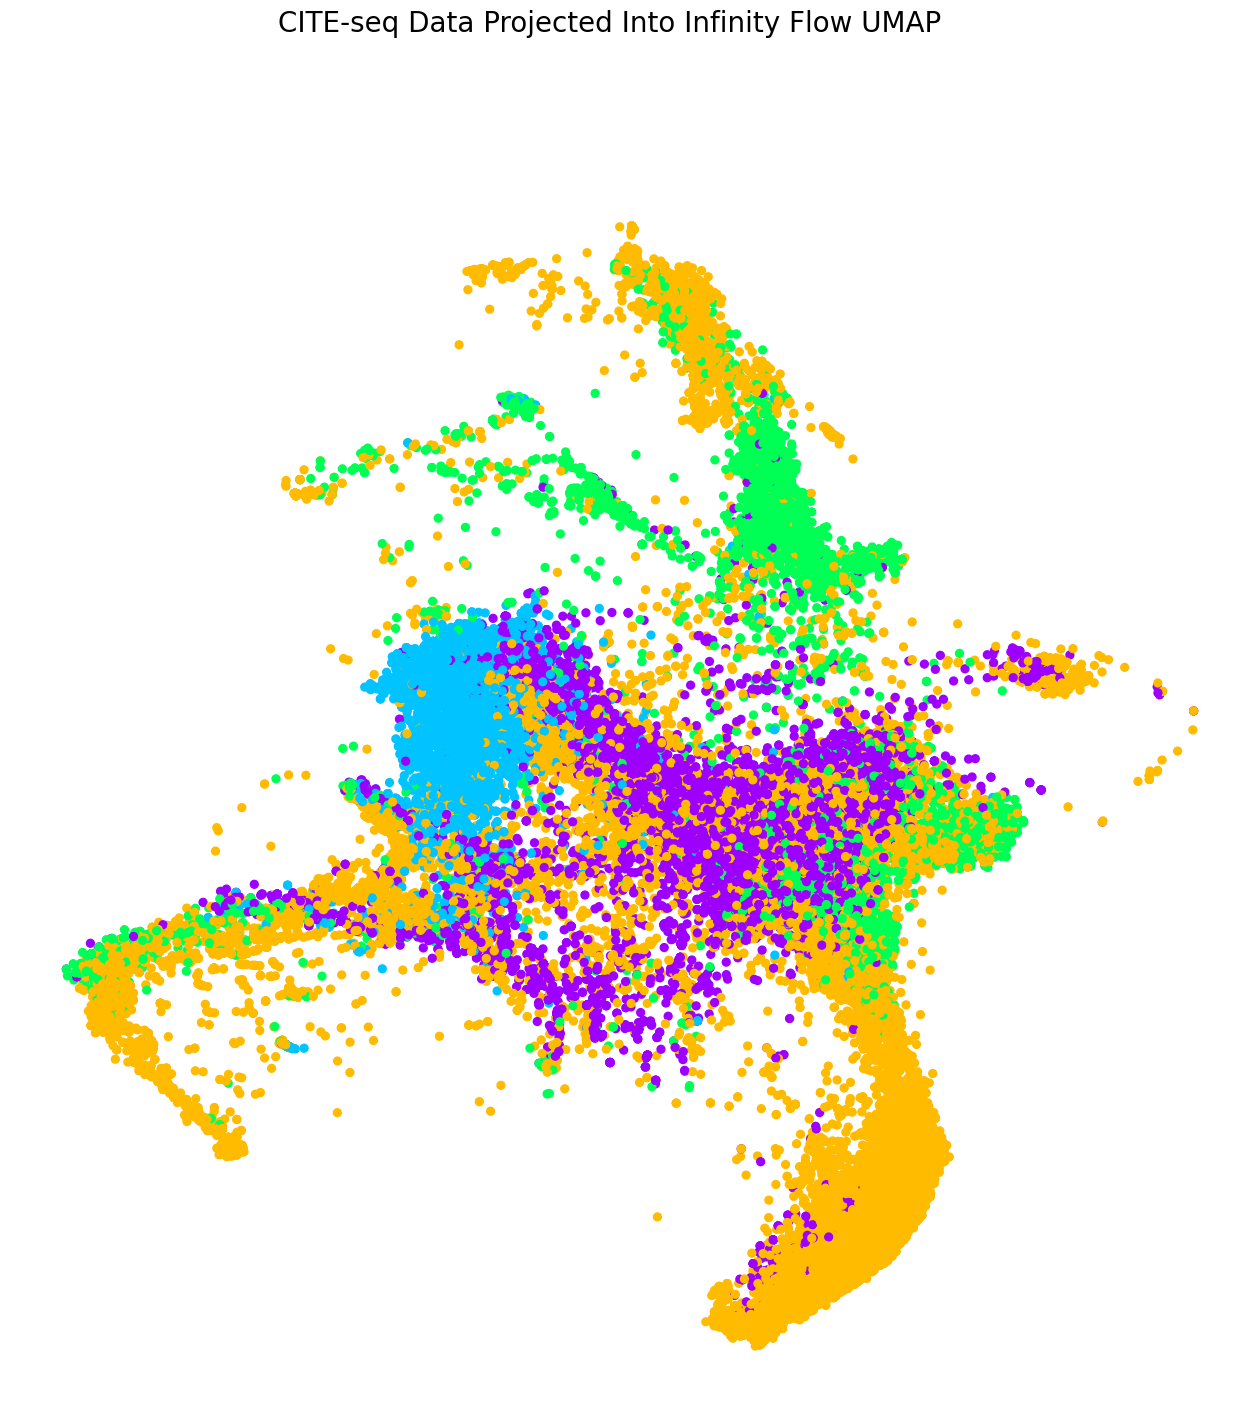

In [51]:
plt.close("all")
fig = plt.figure()
ax = fig.add_subplot()
# # Background sampled from all recorded cells
# ax.scatter(\
#     even_sampled_umap["umap-x"].values,
#     even_sampled_umap["umap-y"].values,
#     c="gray", s=2, alpha=0.05)


# ax.scatter(\
#     inflow_umap.loc[gate_mdp["cell_number"].values+1, "umap-x"].values,
#     inflow_umap.loc[gate_mdp["cell_number"].values+1, "umap-y"].values,
#     c="green", s=2, alpha=0.5)

ax.scatter(\
    plot_cite_umap["umap-x"].values,
    plot_cite_umap["umap-y"].values,
    c=plot_cite_umap["color"].values, 
    s=32, 
    alpha=1)



ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
fig.set_figwidth(16)
fig.set_figheight(16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.suptitle(f"CITE-seq Data Projected Into Infinity Flow UMAP", fontsize=20)

plt.savefig("output/plots_for_publication/opti_cite_seq_embedded_into_infinityflow_color_by_sample.pdf")

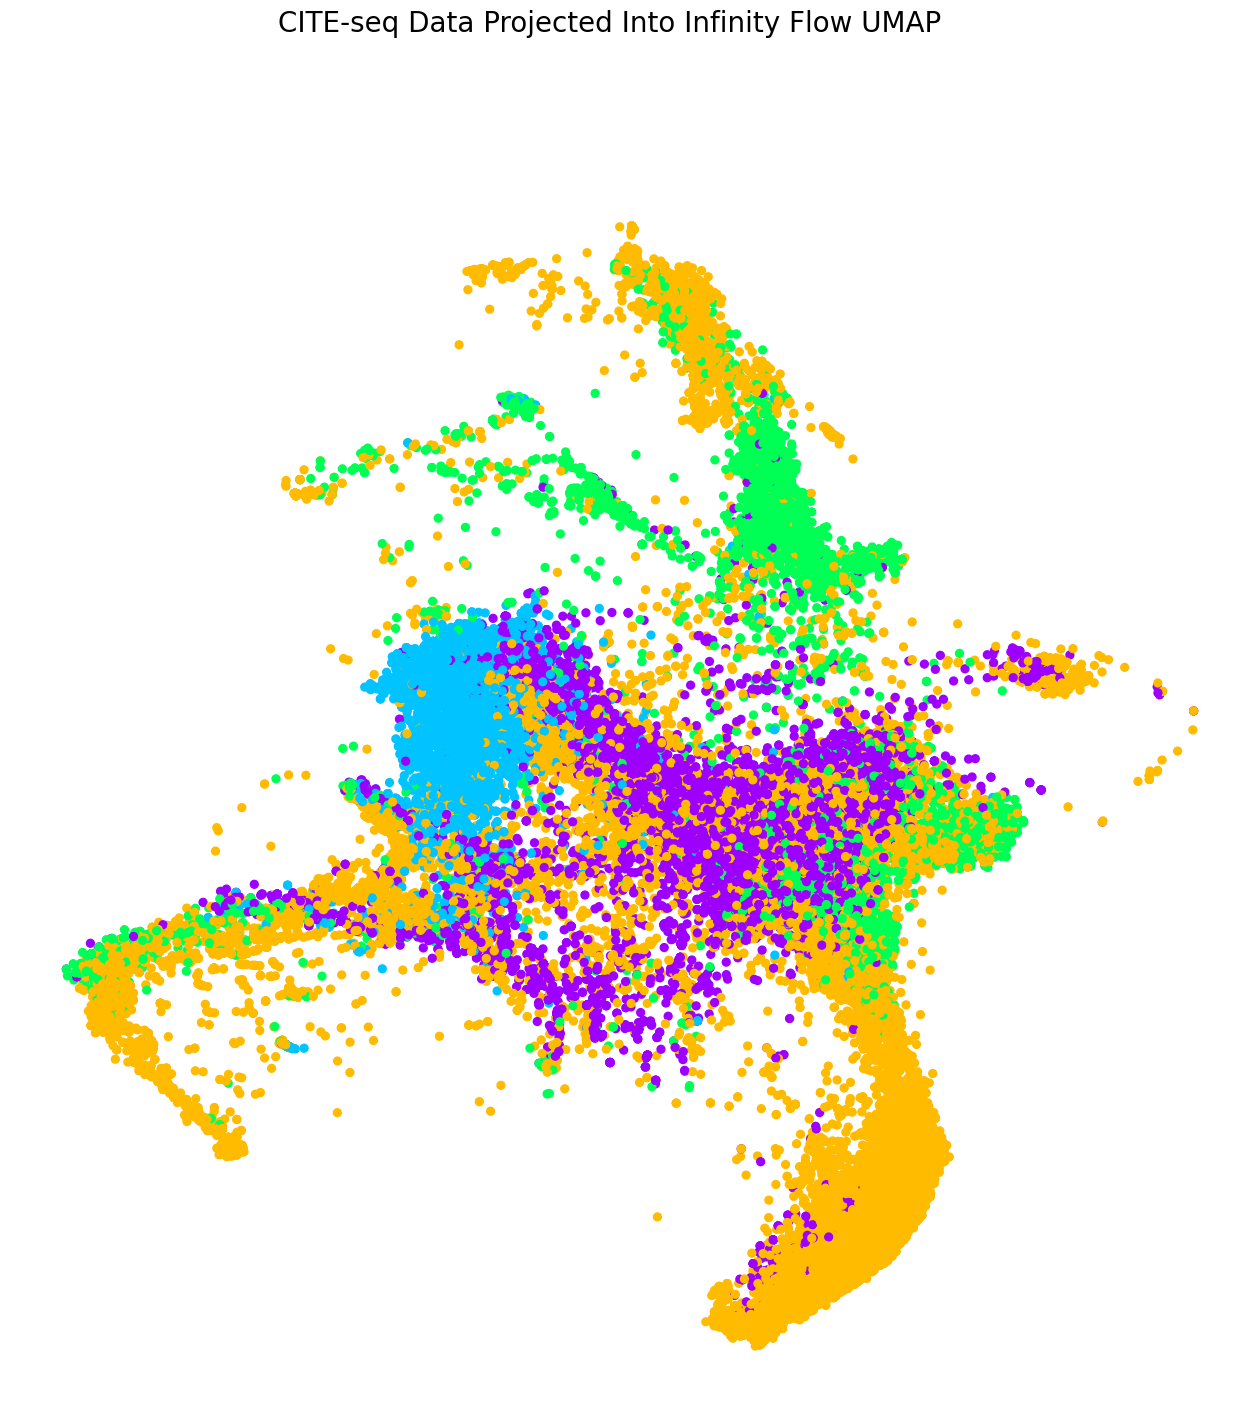

In [52]:
plt.close("all")
fig = plt.figure()
ax = fig.add_subplot()
# # Background sampled from all recorded cells
# ax.scatter(\
#     even_sampled_umap["umap-x"].values,
#     even_sampled_umap["umap-y"].values,
#     c="gray", s=2, alpha=0.05)


# ax.scatter(\
#     inflow_umap.loc[gate_mdp["cell_number"].values+1, "umap-x"].values,
#     inflow_umap.loc[gate_mdp["cell_number"].values+1, "umap-y"].values,
#     c="green", s=2, alpha=0.5)

ax.scatter(\
    plot_cite_umap["umap-x"].values,
    plot_cite_umap["umap-y"].values,
    c=plot_cite_umap["color"].values, 
    s=32, 
    alpha=1)



ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
fig.set_figwidth(16)
fig.set_figheight(16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.suptitle(f"CITE-seq Data Projected Into Infinity Flow UMAP", fontsize=20)

plt.savefig("output/plots_for_publication/opti_cite_seq_embedded_into_infinityflow_color_by_sample.png",
    dpi=600)

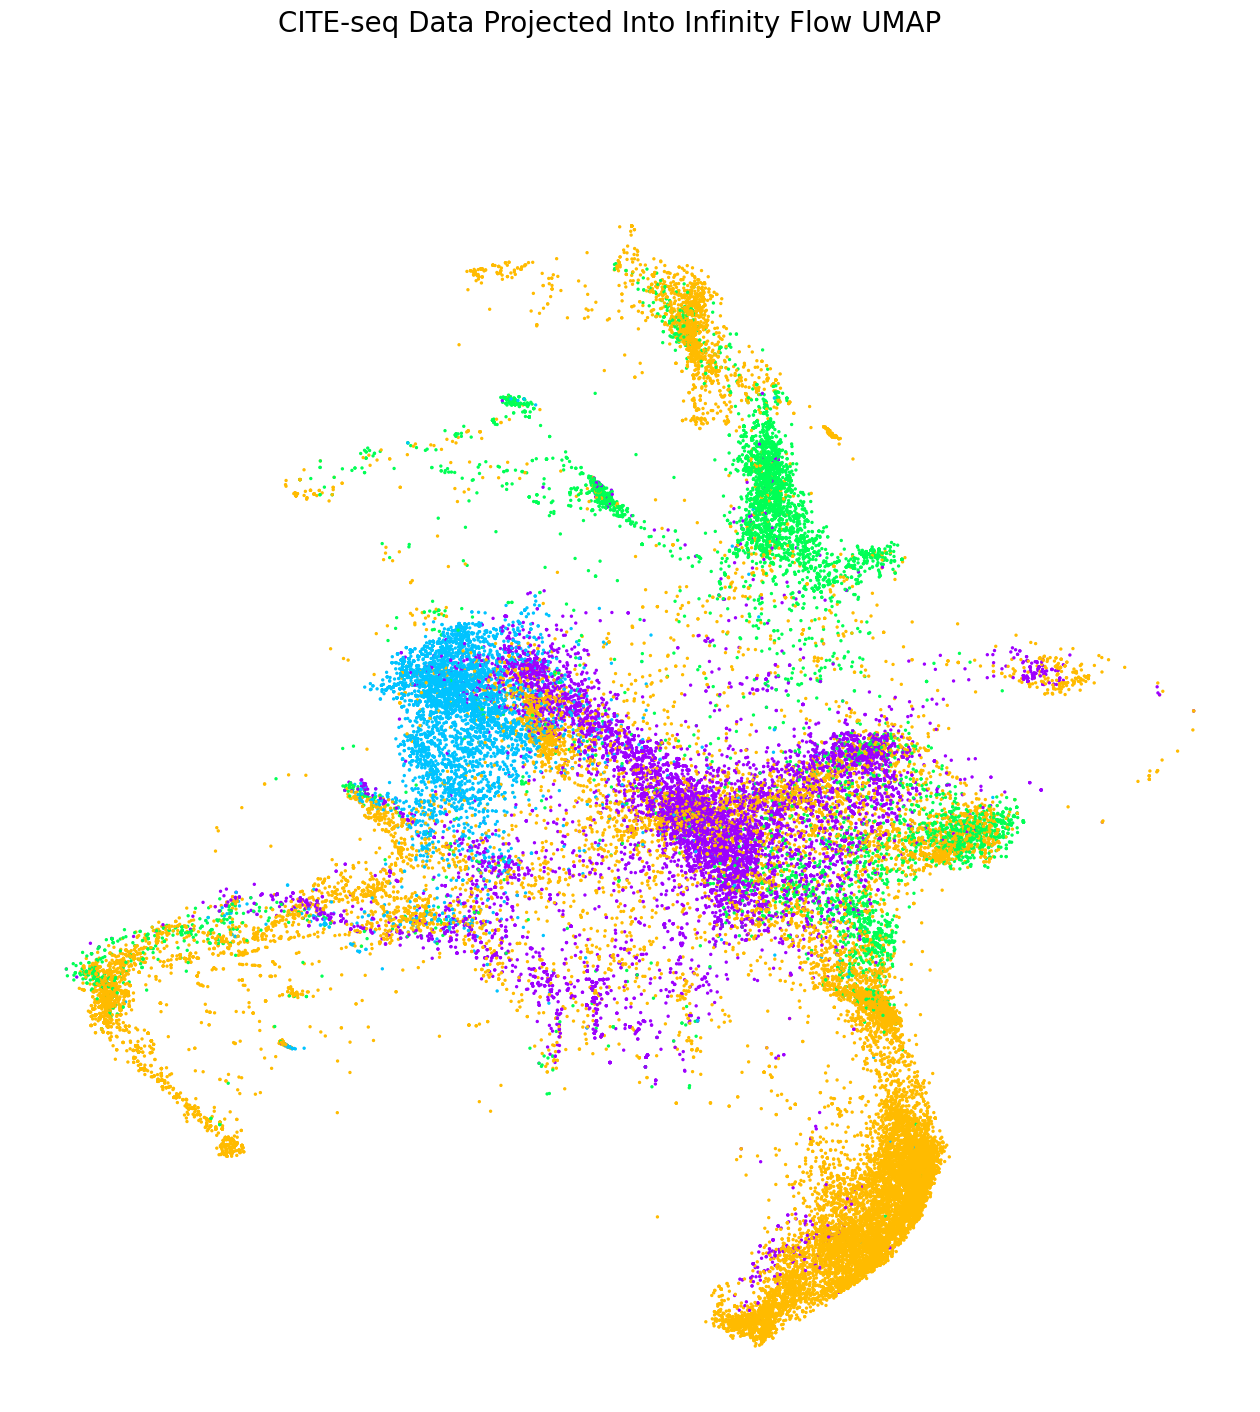

In [53]:
plt.close("all")
fig = plt.figure()
ax = fig.add_subplot()
# # Background sampled from all recorded cells
# ax.scatter(\
#     even_sampled_umap["umap-x"].values,
#     even_sampled_umap["umap-y"].values,
#     c="gray", s=2, alpha=0.05)


# ax.scatter(\
#     inflow_umap.loc[gate_mdp["cell_number"].values+1, "umap-x"].values,
#     inflow_umap.loc[gate_mdp["cell_number"].values+1, "umap-y"].values,
#     c="green", s=2, alpha=0.5)

ax.scatter(\
    plot_cite_umap["umap-x"].values,
    plot_cite_umap["umap-y"].values,
    c=plot_cite_umap["color"].values, 
    s=2, 
    alpha=1)



ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
fig.set_figwidth(16)
fig.set_figheight(16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
fig.suptitle(f"CITE-seq Data Projected Into Infinity Flow UMAP", fontsize=20)

plt.savefig("output/plots_for_publication/opti_cite_seq_embedded_into_infinityflow_color_by_sample_small_points.pdf")